# Mise en forme et pretraitement des données

In [ ]:
# Telechargements des données
# Features
# !wget "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+8+-+Participez+%C3%A0+la+conception+d'une+voiture+autonome/P8_Cityscapes_leftImg8bit_trainvaltest.zip"

# Labels
# !wget "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+8+-+Participez+%C3%A0+la+conception+d'une+voiture+autonome/P8_Cityscapes_gtFine_trainvaltest.zip"

# Unzip des données
# !unzip ""
# !unzip ""

In [ ]:
import os

In [63]:
# Data Folder Path
FEATURES_PATH = "../data/leftImg8bit"
LABELS_PATH = "../data/gtFine"


print("FEATURE FOLDER CONTENT: ",os.listdir(FEATURES_PATH))
print("LABELS  FOLDER CONTENT: ", os.listdir(LABELS_PATH))

FEATURE FOLDER CONTENT:  ['test', 'train', 'val']
LABELS  FOLDER CONTENT:  ['test', 'train', 'val']


In [64]:
FOLDERS = ['train', 'test', 'val']

print("FEATURES:")
for fold in FOLDERS:
    print(os.listdir(os.path.join(FEATURES_PATH, fold)))

    
    
print("\nLABELS:")
for fold in FOLDERS:
    print(os.listdir(os.path.join(FEATURES_PATH, fold)))

FEATURES:
['aachen', 'bochum', 'bremen', 'cologne', 'darmstadt', 'dusseldorf', 'erfurt', 'hamburg', 'hanover', 'jena', 'krefeld', 'monchengladbach', 'strasbourg', 'stuttgart', 'tubingen', 'ulm', 'weimar', 'zurich']
['berlin', 'bielefeld', 'bonn', 'leverkusen', 'mainz', 'munich']
['frankfurt', 'lindau', 'munster']

LABELS:
['aachen', 'bochum', 'bremen', 'cologne', 'darmstadt', 'dusseldorf', 'erfurt', 'hamburg', 'hanover', 'jena', 'krefeld', 'monchengladbach', 'strasbourg', 'stuttgart', 'tubingen', 'ulm', 'weimar', 'zurich']
['berlin', 'bielefeld', 'bonn', 'leverkusen', 'mainz', 'munich']
['frankfurt', 'lindau', 'munster']


In [102]:
import os


def check_data_integrity(features_path, label_path):
    """Vérifie l'intégrité des données entre les dossiers features et labels pour chaque split (train, test, val).

    Cette fonction compare les sous-dossiers et le nombre de fichiers dans chaque répertoire
    correspondant aux données d'entraînement, de test et de validation. Elle affiche un message
    si les structures ne correspondent pas ou si les nombres de fichiers diffèrent.

    Args:
        features_path (str): Chemin vers le dossier contenant les données features (images).
        label_path (str): Chemin vers le dossier contenant les données labels (masques).
    """
    SPLIT_FOLDERS = ['train', 'test', 'val']

    for split in SPLIT_FOLDERS:
        features_dir = os.path.join(features_path, split)
        labels_dir = os.path.join(label_path, split)

        # Vérifier que les deux dossiers existent
        if not os.path.exists(features_dir) or not os.path.exists(labels_dir):
            print(f"Erreur : Un des dossiers '{split}' est manquant.")
            continue

        features_subfolders = os.listdir(features_dir)
        labels_subfolders = os.listdir(labels_dir)

        if sorted(features_subfolders) != sorted(labels_subfolders):
            print(f"[{split}] Les sous-dossiers ne correspondent pas")
            continue

        total_features = 0
        total_labels = 0

        for subfolder in sorted(features_subfolders):
            feat_count = len(os.listdir(os.path.join(features_dir, subfolder)))
            label_count = len(os.listdir(os.path.join(labels_dir, subfolder)))

            if feat_count != label_count / 4:
                print(f"[{split}/{subfolder}] Nombre de fichiers différent : {feat_count} features vs {label_count} labels")

            total_features += feat_count
            total_labels += label_count

        print(f"[{split}]: {total_features} features, {int(total_labels/4)}(x4) labels ")

In [103]:
check_data_integrity(FEATURES_PATH, LABELS_PATH)

[train]: 2975 features, 2975(x4) labels 
[test]: 1525 features, 1525(x4) labels 
[val]: 500 features, 500(x4) labels 


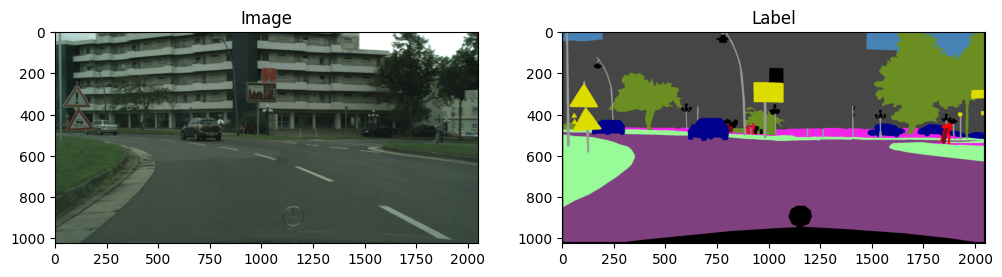

In [107]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Chemin vers les répertoires
train_images_dir = r'C:\Users\223115316\Documents\GitHub\OC\Projet8\data\leftImg8bit\train'
train_labels_dir = r"C:\Users\223115316\Documents\GitHub\OC\Projet8\data\gtFine\train"

# Fonction pour visualiser une image et son annotation
def visualize_image_and_label(image_path, label_path):
    image = Image.open(image_path)
    label = Image.open(label_path)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Image')
    plt.subplot(1, 2, 2)
    plt.imshow(label, cmap='gray')
    plt.title('Label')
    plt.show()

# Exemple de visualisation
image_path = os.path.join(train_images_dir, r'aachen\aachen_000000_000019_leftImg8bit.png')
label_path = os.path.join(train_labels_dir, r'aachen\aachen_000000_000019_gtFine_color.png')
visualize_image_and_label(image_path, label_path)
